# Logistic regression with many features

Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:
$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$
Let's load the data first:

In [9]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [10]:
import pandas as pd
# Download the data file:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/hmx_data.csv'
!curl -O $url
# Load the data using pandas
data = pd.read_csv('hmx_data.csv')
# Extract data for regression
# Heights as a numpy array
x = data['Height'].values
# The labels must be 0 and 1
# We will use a dictionary to indicate our labeling
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   3427      0 --:--:-- --:--:-- --:--:--  3402


,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Now let's train a second degree polynomial model:

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])
model = LogisticRegression().fit(Phi, y)

Here are the model parameters:

In [12]:
model.coef_.round(2)

array([[-0.  ,  0.42, -0.  ]])

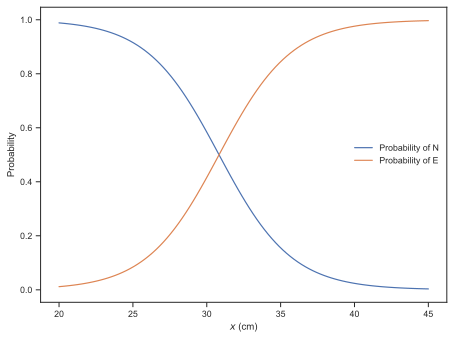

In [13]:
fig, ax = make_full_width_fig()
xx = np.linspace(20.0, 45.0, 100)
Phi_xx = poly.fit_transform(xx[:, None])
predictions_xx = model.predict_proba(Phi_xx)
ax.plot(xx, predictions_xx[:, 0], label='Probability of N')
ax.plot(xx, predictions_xx[:, 1], label='Probability of E')
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best')
save_for_book(fig, 'ch16.fig3')

## Questions

+ Do you think that it is worth going to a second degree model? Can you think of a way to compare the two models?
+ Rerun the code above with polynomial degree 3, 4, and 5. What do you observe? Do you trust the results? Why or why not?